In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import get_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from pandas_profiling import ProfileReport

In [4]:
df1 = pd.read_csv('Traveldata_train.csv')
df1.head()

ID  Gender    CustomerType   Age       TypeTravel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business travel     Business   

   Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  
0              272                     0.0                   5.0  
1             2200                     9.0                   0.0  
2             1061                    77.0                 119.0  
3              780                    13.0                  18.0  
4             1981                     0.0                   0.0

In [5]:
df1.shape

(94379, 9)

In [6]:
df2 = pd.read_csv('Surveydata_train.csv')
df2.head()

ID  Overall_Experience      Seat_comfort Seat_Class  \
0  98800001                   0  need improvement  Green Car   
1  98800002                   0              poor   Ordinary   
2  98800003                   1  need improvement  Green Car   
3  98800004                   0        acceptable   Ordinary   
4  98800005                   1        acceptable   Ordinary   

  Arrival_time_convenient          Catering Platform_location  \
0               excellent         excellent   very convinient   
1               excellent              poor  need improvement   
2        need improvement  need improvement  need improvement   
3        need improvement               NaN  need improvement   
4              acceptable        acceptable        manageable   

  Onboardwifi_service Onboard_entertainment Online_support Onlinebooking_Ease  \
0                good      need improvement     acceptable   need improvement   
1                good                  poor           good               good   
2    need improvement                  good      excellent          excellent   
3          acceptable      need improvement     acceptable         acceptable   
4    need improvement                  good      excellent               good   

    Onboard_service          Leg_room  Baggage_handling   Checkin_service  \
0  need improvement        acceptable  need improvement              good   
1         excellent  need improvement              poor  need improvement   
2         excellent         excellent         excellent              good   
3        acceptable        acceptable        acceptable              good   
4              good              good              good              good   

        Cleanliness Online_boarding  
0  need improvement            poor  
1              good            good  
2         excellent       excellent  
3        acceptable      acceptable  
4              good            good

In [7]:
df2.shape

(94379, 17)

In [8]:
df = pd.merge(df1,df2,on='ID')
df.head()

ID  Gender    CustomerType   Age       TypeTravel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business travel     Business   

   Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  \
0              272                     0.0                   5.0   
1             2200                     9.0                   0.0   
2             1061                    77.0                 119.0   
3              780                    13.0                  18.0   
4             1981                     0.0                   0.0   

   Overall_Experience      Seat_comfort Seat_Class Arrival_time_convenient  \
0                   0  need improvement  Green Car               excellent   
1                   0              poor   Ordinary               excellent   
2                   1  need improvement  Green Car        need improvement   
3                   0        acceptable   Ordinary        need improvement   
4                   1        acceptable   Ordinary              acceptable   

           Catering Platform_location Onboardwifi_service  \
0         excellent   very convinient                good   
1              poor  need improvement                good   
2  need improvement  need improvement    need improvement   
3               NaN  need improvement          acceptable   
4        acceptable        manageable    need improvement   

  Onboard_entertainment Online_support Onlinebooking_Ease   Onboard_service  \
0      need improvement     acceptable   need improvement  need improvement   
1                  poor           good               good         excellent   
2                  good      excellent          excellent         excellent   
3      need improvement     acceptable         acceptable        acceptable   
4                  good      excellent               good              good   

           Leg_room  Baggage_handling   Checkin_service       Cleanliness  \
0        acceptable  need improvement              good  need improvement   
1  need improvement              poor  need improvement              good   
2         excellent         excellent              good         excellent   
3        acceptable        acceptable              good        acceptable   
4              good              good              good              good   

  Online_boarding  
0            poor  
1            good  
2       excellent  
3      acceptable  
4            good

In [9]:
df.shape

(94379, 25)

In [10]:
df.dtypes

ID                           int64
Gender                      object
CustomerType                object
Age                        float64
TypeTravel                  object
Travel_Class                object
Travel_Distance              int64
DepartureDelay_in_Mins     float64
ArrivalDelay_in_Mins       float64
Overall_Experience           int64
Seat_comfort                object
Seat_Class                  object
Arrival_time_convenient     object
Catering                    object
Platform_location           object
Onboardwifi_service         object
Onboard_entertainment       object
Online_support              object
Onlinebooking_Ease          object
Onboard_service             object
Leg_room                    object
Baggage_handling            object
Checkin_service             object
Cleanliness                 object
Online_boarding             object
dtype: object

In [11]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df.isnull().sum()

ID                            0
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [13]:
df.Gender.fillna('Female',inplace=True)
df.CustomerType.fillna('Loyal Customer',inplace=True)
df.Age.fillna(df.Age.mean(),inplace=True)
df.TypeTravel.fillna('Business travel',inplace=True)
df.DepartureDelay_in_Mins.fillna(df.DepartureDelay_in_Mins.mean(),inplace=True)
df.ArrivalDelay_in_Mins.fillna(df.ArrivalDelay_in_Mins.mean(),inplace=True)
df.Seat_comfort.fillna('acceptable',inplace=True)
df.Arrival_time_convenient.fillna('good',inplace=True)
df.Catering.fillna('acceptable',inplace=True)
df.Platform_location.fillna('manageable',inplace=True)
df.Onboardwifi_service.fillna('good',inplace=True)
df.Onboard_entertainment.fillna('good',inplace=True)
df.Online_support.fillna('good',inplace=True)
df.Onlinebooking_Ease.fillna('good',inplace=True)
df.Onboard_service.fillna('good',inplace=True)
df.Leg_room.fillna('good',inplace=True)
df.Baggage_handling.fillna('good',inplace=True)
df.Checkin_service.fillna('good',inplace=True)
df.Online_boarding.fillna('good',inplace=True)
df.Cleanliness.fillna('good',inplace=True)

In [14]:
df.isnull().sum()

ID                         0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [15]:
df.shape

(94379, 25)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

orderencoding = OrdinalEncoder(categories = [["extremely poor", "poor", "need improvement", "acceptable","good","excellent"]])


df['Seat_comfort'] = orderencoding.fit_transform(df['Seat_comfort'].values.reshape(-1,1))
df['Arrival_time_convenient'] = orderencoding.fit_transform(df['Arrival_time_convenient'].values.reshape(-1,1))
df['Catering'] = orderencoding.fit_transform(df['Catering'].values.reshape(-1,1))
df['Onboardwifi_service'] = orderencoding.fit_transform(df['Onboardwifi_service'].values.reshape(-1,1))
df['Onboard_entertainment'] = orderencoding.fit_transform(df['Onboard_entertainment'].values.reshape(-1,1))
df['Online_support'] = orderencoding.fit_transform(df['Online_support'].values.reshape(-1,1))
df['Onlinebooking_Ease'] = orderencoding.fit_transform(df['Onlinebooking_Ease'].values.reshape(-1,1))
df['Onboard_service'] = orderencoding.fit_transform(df['Onboard_service'].values.reshape(-1,1))
df['Leg_room'] = orderencoding.fit_transform(df['Leg_room'].values.reshape(-1,1))
df['Baggage_handling'] = orderencoding.fit_transform(df['Baggage_handling'].values.reshape(-1,1))
df['Checkin_service'] = orderencoding.fit_transform(df['Checkin_service'].values.reshape(-1,1))
df['Cleanliness'] = orderencoding.fit_transform(df['Cleanliness'].values.reshape(-1,1))
df['Online_boarding'] = orderencoding.fit_transform(df['Online_boarding'].values.reshape(-1,1))



df.head()

ID  Gender    CustomerType   Age       TypeTravel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0  Business travel     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business travel     Business   

   Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  \
0              272                     0.0                   5.0   
1             2200                     9.0                   0.0   
2             1061                    77.0                 119.0   
3              780                    13.0                  18.0   
4             1981                     0.0                   0.0   

   Overall_Experience  Seat_comfort Seat_Class  Arrival_time_convenient  \
0                   0           2.0  Green Car                      5.0   
1                   0           1.0   Ordinary                      5.0   
2                   1           2.0  Green Car                      2.0   
3                   0           3.0   Ordinary                      2.0   
4                   1           3.0   Ordinary                      3.0   

   Catering Platform_location  Onboardwifi_service  Onboard_entertainment  \
0       5.0   very convinient                  4.0                    2.0   
1       1.0  need improvement                  4.0                    1.0   
2       2.0  need improvement                  2.0                    4.0   
3       3.0  need improvement                  3.0                    2.0   
4       3.0        manageable                  2.0                    4.0   

   Online_support  Onlinebooking_Ease  Onboard_service  Leg_room  \
0             3.0                 2.0              2.0       3.0   
1             4.0                 4.0              5.0       2.0   
2             5.0                 5.0              5.0       5.0   
3             3.0                 3.0              3.0       3.0   
4             5.0                 4.0              4.0       4.0   

   Baggage_handling  Checkin_service  Cleanliness  Online_boarding  
0               2.0              4.0          2.0              1.0  
1               1.0              2.0          4.0              4.0  
2               5.0              4.0          5.0              5.0  
3               3.0              4.0          3.0              3.0  
4               4.0              4.0          4.0              4.0

In [17]:
df.Platform_location.unique()

array(['very convinient', 'need improvement', 'manageable',
       'Inconvinient', 'Convinient', 'very inconvinient'], dtype=object)

In [18]:
orderencode = OrdinalEncoder(categories = [["very inconvinient", "Inconvinient", "need improvement", "manageable","Convinient","very convinient"]])
df['Platform_location'] = orderencode.fit_transform(df['Platform_location'].values.reshape(-1,1))

In [19]:
df.head()

ID  Gender    CustomerType   Age       TypeTravel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0  Business travel     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business travel     Business   

   Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  \
0              272                     0.0                   5.0   
1             2200                     9.0                   0.0   
2             1061                    77.0                 119.0   
3              780                    13.0                  18.0   
4             1981                     0.0                   0.0   

   Overall_Experience  Seat_comfort Seat_Class  Arrival_time_convenient  \
0                   0           2.0  Green Car                      5.0   
1                   0           1.0   Ordinary                      5.0   
2                   1           2.0  Green Car                      2.0   
3                   0           3.0   Ordinary                      2.0   
4                   1           3.0   Ordinary                      3.0   

   Catering  Platform_location  Onboardwifi_service  Onboard_entertainment  \
0       5.0                5.0                  4.0                    2.0   
1       1.0                2.0                  4.0                    1.0   
2       2.0                2.0                  2.0                    4.0   
3       3.0                2.0                  3.0                    2.0   
4       3.0                3.0                  2.0                    4.0   

   Online_support  Onlinebooking_Ease  Onboard_service  Leg_room  \
0             3.0                 2.0              2.0       3.0   
1             4.0                 4.0              5.0       2.0   
2             5.0                 5.0              5.0       5.0   
3             3.0                 3.0              3.0       3.0   
4             5.0                 4.0              4.0       4.0   

   Baggage_handling  Checkin_service  Cleanliness  Online_boarding  
0               2.0              4.0          2.0              1.0  
1               1.0              2.0          4.0              4.0  
2               5.0              4.0          5.0              5.0  
3               3.0              4.0          3.0              3.0  
4               4.0              4.0          4.0              4.0

In [20]:
df.Seat_Class.unique()

array(['Green Car', 'Ordinary'], dtype=object)

In [21]:
orderencode2 = OrdinalEncoder(categories = [["Ordinary", "Green Car"]])
df['Seat_Class'] = orderencode2.fit_transform(df['Seat_Class'].values.reshape(-1,1))

In [22]:
df.head()

ID  Gender    CustomerType   Age       TypeTravel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0  Business travel     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business travel     Business   

   Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  \
0              272                     0.0                   5.0   
1             2200                     9.0                   0.0   
2             1061                    77.0                 119.0   
3              780                    13.0                  18.0   
4             1981                     0.0                   0.0   

   Overall_Experience  Seat_comfort  Seat_Class  Arrival_time_convenient  \
0                   0           2.0         1.0                      5.0   
1                   0           1.0         0.0                      5.0   
2                   1           2.0         1.0                      2.0   
3                   0           3.0         0.0                      2.0   
4                   1           3.0         0.0                      3.0   

   Catering  Platform_location  Onboardwifi_service  Onboard_entertainment  \
0       5.0                5.0                  4.0                    2.0   
1       1.0                2.0                  4.0                    1.0   
2       2.0                2.0                  2.0                    4.0   
3       3.0                2.0                  3.0                    2.0   
4       3.0                3.0                  2.0                    4.0   

   Online_support  Onlinebooking_Ease  Onboard_service  Leg_room  \
0             3.0                 2.0              2.0       3.0   
1             4.0                 4.0              5.0       2.0   
2             5.0                 5.0              5.0       5.0   
3             3.0                 3.0              3.0       3.0   
4             5.0                 4.0              4.0       4.0   

   Baggage_handling  Checkin_service  Cleanliness  Online_boarding  
0               2.0              4.0          2.0              1.0  
1               1.0              2.0          4.0              4.0  
2               5.0              4.0          5.0              5.0  
3               3.0              4.0          3.0              3.0  
4               4.0              4.0          4.0              4.0

In [23]:
df.dtypes

ID                           int64
Gender                      object
CustomerType                object
Age                        float64
TypeTravel                  object
Travel_Class                object
Travel_Distance              int64
DepartureDelay_in_Mins     float64
ArrivalDelay_in_Mins       float64
Overall_Experience           int64
Seat_comfort               float64
Seat_Class                 float64
Arrival_time_convenient    float64
Catering                   float64
Platform_location          float64
Onboardwifi_service        float64
Onboard_entertainment      float64
Online_support             float64
Onlinebooking_Ease         float64
Onboard_service            float64
Leg_room                   float64
Baggage_handling           float64
Checkin_service            float64
Cleanliness                float64
Online_boarding            float64
dtype: object

In [24]:
df.columns

Index(['ID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [25]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include=np.number)

In [26]:
df_cat.head()

Gender    CustomerType       TypeTravel Travel_Class
0  Female  Loyal Customer  Business travel     Business
1    Male  Loyal Customer  Personal Travel          Eco
2  Female  Loyal Customer  Business travel     Business
3  Female  Loyal Customer  Business travel     Business
4  Female  Loyal Customer  Business travel     Business

In [27]:
dummies = pd.get_dummies(df_cat,drop_first=True)
dummies.head()

Gender_Male  CustomerType_disloyal Customer  TypeTravel_Personal Travel  \
0            0                               0                           0   
1            1                               0                           1   
2            0                               0                           0   
3            0                               0                           0   
4            0                               0                           0   

   Travel_Class_Eco  
0                 0  
1                 1  
2                 0  
3                 0  
4                 0

In [28]:
df_num.drop('ID',axis=1,inplace=True)

In [29]:
df_num.describe()

Age  Travel_Distance  DepartureDelay_in_Mins  \
count  94379.000000     94379.000000            94379.000000   
mean      39.419647      1978.888185               14.647092   
std       15.113989      1027.961019               38.127262   
min        7.000000        50.000000                0.000000   
25%       27.000000      1359.000000                0.000000   
50%       40.000000      1923.000000                0.000000   
75%       51.000000      2538.000000               12.000000   
max       85.000000      6951.000000             1592.000000   

       ArrivalDelay_in_Mins  Overall_Experience  Seat_comfort    Seat_Class  \
count          94379.000000        94379.000000  94379.000000  94379.000000   
mean              15.005222            0.546658      2.839286      0.502601   
std               38.366639            0.497821      1.392082      0.499996   
min                0.000000            0.000000      0.000000      0.000000   
25%                0.000000            0.000000      2.000000      0.000000   
50%                0.000000            1.000000      3.000000      1.000000   
75%               13.000000            1.000000      4.000000      1.000000   
max             1584.000000            1.000000      5.000000      1.000000   

       Arrival_time_convenient      Catering  Platform_location  \
count             94379.000000  94379.000000       94379.000000   
mean                  3.090084      2.867078           2.990867   
std                   1.481769      1.376110           1.308025   
min                   0.000000      0.000000           0.000000   
25%                   2.000000      2.000000           2.000000   
50%                   3.000000      3.000000           3.000000   
75%                   4.000000      4.000000           4.000000   
max                   5.000000      5.000000           5.000000   

       Onboardwifi_service  Onboard_entertainment  Online_support  \
count         94379.000000           94379.000000    94379.000000   
mean              3.248466               3.382627        3.519713   
std               1.319379               1.346088        1.307628   
min               0.000000               0.000000        0.000000   
25%               2.000000               2.000000        3.000000   
50%               3.000000               4.000000        4.000000   
75%               4.000000               4.000000        5.000000   
max               5.000000               5.000000        5.000000   

       Onlinebooking_Ease  Onboard_service      Leg_room  Baggage_handling  \
count        94379.000000     94379.000000  94379.000000      94379.000000   
mean             3.470518         3.513419      3.483487          3.697242   
std              1.305124         1.224912      1.291743          1.155589   
min              0.000000         0.000000      0.000000          1.000000   
25%              2.000000         3.000000      2.000000          3.000000   
50%              4.000000         4.000000      4.000000          4.000000   
75%              5.000000         4.000000      5.000000          5.000000   
max              5.000000         5.000000      5.000000          5.000000   

       Checkin_service   Cleanliness  Online_boarding  
count     94379.000000  94379.000000     94379.000000  
mean          3.342936      3.704097         3.351943  
std           1.259933      1.151954         1.298030  
min           0.000000      0.000000         0.000000  
25%           3.000000      3.000000         2.000000  
50%           3.000000      4.000000         4.000000  
75%           4.000000      5.000000         4.000000  
max           5.000000      5.000000         5.000000

In [30]:
df_final = pd.concat([dummies,df_num],axis=1)
df_final.head()

Gender_Male  CustomerType_disloyal Customer  TypeTravel_Personal Travel  \
0            0                               0                           0   
1            1                               0                           1   
2            0                               0                           0   
3            0                               0                           0   
4            0                               0                           0   

   Travel_Class_Eco   Age  Travel_Distance  DepartureDelay_in_Mins  \
0                 0  52.0              272                     0.0   
1                 1  48.0             2200                     9.0   
2                 0  43.0             1061                    77.0   
3                 0  44.0              780                    13.0   
4                 0  50.0             1981                     0.0   

   ArrivalDelay_in_Mins  Overall_Experience  Seat_comfort  Seat_Class  \
0                   5.0                   0           2.0         1.0   
1                   0.0                   0           1.0         0.0   
2                 119.0                   1           2.0         1.0   
3                  18.0                   0           3.0         0.0   
4                   0.0                   1           3.0         0.0   

   Arrival_time_convenient  Catering  Platform_location  Onboardwifi_service  \
0                      5.0       5.0                5.0                  4.0   
1                      5.0       1.0                2.0                  4.0   
2                      2.0       2.0                2.0                  2.0   
3                      2.0       3.0                2.0                  3.0   
4                      3.0       3.0                3.0                  2.0   

   Onboard_entertainment  Online_support  Onlinebooking_Ease  Onboard_service  \
0                    2.0             3.0                 2.0              2.0   
1                    1.0             4.0                 4.0              5.0   
2                    4.0             5.0                 5.0              5.0   
3                    2.0             3.0                 3.0              3.0   
4                    4.0             5.0                 4.0              4.0   

   Leg_room  Baggage_handling  Checkin_service  Cleanliness  Online_boarding  
0       3.0               2.0              4.0          2.0              1.0  
1       2.0               1.0              2.0          4.0              4.0  
2       5.0               5.0              4.0          5.0              5.0  
3       3.0               3.0              4.0          3.0              3.0  
4       4.0               4.0              4.0          4.0              4.0

In [31]:
df_final.shape

(94379, 24)

In [32]:
df_target = df_final['Overall_Experience']
df_feature = df_final.drop('Overall_Experience',axis=1)

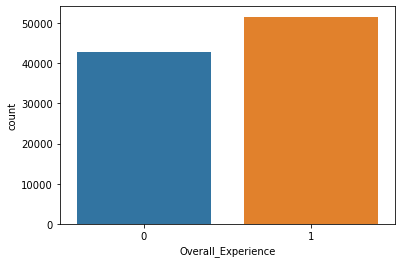

In [33]:
sns.countplot(df_target)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature,df_target,test_size=0.15,random_state=10)
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (80222, 23)
X test shape (14157, 23)
y train shape (80222,)
y test shape (14157,)


In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [36]:
# Logistic Regression

In [37]:
logreg = LogisticRegression()
model_logreg = logreg.fit(X_train,y_train)
y_pred_logreg = model_logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg))
cm_logreg = confusion_matrix(y_test,y_pred_logreg)
print(cm_logreg)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      6415
           1       0.78      0.86      0.82      7742

    accuracy                           0.79     14157
   macro avg       0.80      0.79      0.79     14157
weighted avg       0.79      0.79      0.79     14157

[[4583 1832]
 [1096 6646]]


In [38]:
cols = ['Algorithm', 'Accuracy', 'F1_score']
result_table = pd.DataFrame(columns=cols)
acc_logreg = model_logreg.score(X_test,y_test)
f1_logreg = metrics.f1_score(y_test,y_pred_logreg)
log_reg_metrics = pd.Series({'Algorithm':'Logistic Regressiom',
                            'Accuracy':acc_logreg*100,
                            'F1_score': "{:.2f}".format(f1_logreg)})

result_table = result_table.append(log_reg_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0  Logistic Regressiom  79.317652     0.82

In [39]:
# Naive Baye's Algorithm

In [40]:
gauss = GaussianNB()
model_gauss = gauss.fit(X_train, y_train)
y_pred_gauss = model_gauss.predict(X_test)
print(classification_report(y_test,y_pred_gauss))
cm_gauss = confusion_matrix(y_test, y_pred_gauss)
cm_gauss

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      6415
           1       0.83      0.85      0.84      7742

    accuracy                           0.82     14157
   macro avg       0.82      0.82      0.82     14157
weighted avg       0.82      0.82      0.82     14157



array([[5084, 1331],
       [1190, 6552]], dtype=int64)

In [41]:
acc_gauss = model_gauss.score(X_test,y_test)
f1_gauss = metrics.f1_score(y_test,y_pred_gauss)
gauss_metrics = pd.Series({'Algorithm':'Gaussian Naive Bayes',
                            'Accuracy':acc_gauss*100,
                            'F1_score': "{:.2f}".format(f1_gauss)})

result_table = result_table.append(gauss_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0   Logistic Regressiom  79.317652     0.82
1  Gaussian Naive Bayes  82.192555     0.84

In [42]:
multinomial = MultinomialNB()
model_multinomial = multinomial.fit(X_train,y_train)
y_pred_multi = model_multinomial.predict(X_test)
print(classification_report(y_test,y_pred_multi))
cm_multi = confusion_matrix(y_test,y_pred_multi)
cm_multi

              precision    recall  f1-score   support

           0       0.60      0.31      0.41      6415
           1       0.59      0.82      0.69      7742

    accuracy                           0.59     14157
   macro avg       0.59      0.57      0.55     14157
weighted avg       0.59      0.59      0.56     14157



array([[1995, 4420],
       [1355, 6387]], dtype=int64)

In [43]:
# KNN Algorithm

In [44]:
knn_classifier  = KNeighborsClassifier()
model_knn = knn_classifier.fit(X_train_scaled,y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred_knn))
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6415
           1       0.94      0.91      0.92      7742

    accuracy                           0.92     14157
   macro avg       0.91      0.92      0.92     14157
weighted avg       0.92      0.92      0.92     14157



array([[5942,  473],
       [ 720, 7022]], dtype=int64)

In [45]:
acc_knn = model_knn.score(X_test_scaled,y_test)
f1_knn = metrics.f1_score(y_test,y_pred_knn)
knn_metrics = pd.Series({'Algorithm':'KNN',
                            'Accuracy':acc_knn*100,
                            'F1_score': "{:.2f}".format(f1_knn)})

result_table = result_table.append(knn_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0   Logistic Regressiom  79.317652     0.82
1  Gaussian Naive Bayes  82.192555     0.84
2                   KNN  91.573073     0.92

In [46]:
# Decision Tree

In [47]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test,y_pred_dt))
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6415
           1       0.93      0.94      0.94      7742

    accuracy                           0.93     14157
   macro avg       0.93      0.93      0.93     14157
weighted avg       0.93      0.93      0.93     14157



array([[5896,  519],
       [ 484, 7258]], dtype=int64)

In [48]:
acc_dt = dt_model.score(X_test,y_test)
f1_dt = metrics.f1_score(y_test,y_pred_dt)

dt_metrics = pd.Series({'Algorithm':'Decision Tree',
                            'Accuracy':acc_dt*100,
                            'F1_score': "{:.2f}".format(f1_dt)})

result_table = result_table.append(dt_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0   Logistic Regressiom  79.317652     0.82
1  Gaussian Naive Bayes  82.192555     0.84
2                   KNN  91.573073     0.92
3         Decision Tree  92.915166     0.94

In [49]:
# Random Forest Algorithm

In [50]:
rd = RandomForestClassifier()
rd_model = rd.fit(X_train,y_train)
y_pred_rd = rd_model.predict(X_test)
print(classification_report(y_test,y_pred_rd))
cm_rd = confusion_matrix(y_test,y_pred_rd)
cm_rd

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6415
           1       0.97      0.95      0.96      7742

    accuracy                           0.95     14157
   macro avg       0.95      0.96      0.95     14157
weighted avg       0.96      0.95      0.95     14157



array([[6154,  261],
       [ 377, 7365]], dtype=int64)

In [51]:
acc_rd = rd_model.score(X_test,y_test)
f1_rd= metrics.f1_score(y_test,y_pred_rd)

rd_metrics = pd.Series({'Algorithm':'Random Forest',
                            'Accuracy':acc_rd*100,
                            'F1_score': "{:.2f}".format(f1_rd)})

result_table = result_table.append(rd_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0   Logistic Regressiom  79.317652     0.82
1  Gaussian Naive Bayes  82.192555     0.84
2                   KNN  91.573073     0.92
3         Decision Tree  92.915166     0.94
4         Random Forest  95.493395     0.96

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:
ada_model = AdaBoostClassifier()

ada_model.fit(X_train, y_train)
y_pred_adaboost = ada_model.predict(X_test)
print(classification_report(y_test,y_pred_adaboost))
cm_adaboost = confusion_matrix(y_test,y_pred_adaboost)
cm_adaboost

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6415
           1       0.91      0.91      0.91      7742

    accuracy                           0.90     14157
   macro avg       0.90      0.90      0.90     14157
weighted avg       0.90      0.90      0.90     14157



array([[5743,  672],
       [ 714, 7028]], dtype=int64)

In [54]:
acc_ada = ada_model.score(X_test,y_test)
f1_ada = metrics.f1_score(y_test,y_pred_adaboost)

ada_metrics = pd.Series({'Algorithm':'Random_forest Ada Boost',
                            'Accuracy':acc_ada*100,
                            'F1_score': "{:.2f}".format(f1_ada)})

result_table = result_table.append(ada_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0      Logistic Regressiom  79.317652     0.82
1     Gaussian Naive Bayes  82.192555     0.84
2                      KNN  91.573073     0.92
3            Decision Tree  92.915166     0.94
4            Random Forest  95.493395     0.96
5  Random_forest Ada Boost  90.209790     0.91

In [55]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 0)

gboost_model.fit(X_train, y_train)
y_pred_gboost = gboost_model.predict(X_test)
print(classification_report(y_test,y_pred_gboost))
cm_gboost = confusion_matrix(y_test,y_pred_gboost)
cm_gboost

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6415
           1       0.96      0.95      0.96      7742

    accuracy                           0.96     14157
   macro avg       0.96      0.96      0.96     14157
weighted avg       0.96      0.96      0.96     14157



array([[6144,  271],
       [ 352, 7390]], dtype=int64)

In [56]:
acc_gboost = gboost_model.score(X_test,y_test)
f1_gboost = metrics.f1_score(y_test,y_pred_gboost)

gboost_metrics = pd.Series({'Algorithm':'Random_forest_Gradient Boost',
                            'Accuracy':acc_gboost*100,
                            'F1_score': "{:.2f}".format(f1_gboost)})

result_table = result_table.append(gboost_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0           Logistic Regressiom  79.317652     0.82
1          Gaussian Naive Bayes  82.192555     0.84
2                           KNN  91.573073     0.92
3                 Decision Tree  92.915166     0.94
4                 Random Forest  95.493395     0.96
5       Random_forest Ada Boost  90.209790     0.91
6  Random_forest_Gradient Boost  95.599350     0.96

In [57]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred_xgboost = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred_xgboost))
cm_xg = confusion_matrix(y_test,y_pred_xgboost)
cm_xg

[15:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6415
           1       0.97      0.96      0.96      7742

    accuracy                           0.96     14157
   macro avg       0.96      0.96      0.96     14157
weighted avg       0.96      0.96      0.96     14157



array([[6148,  267],
       [ 347, 7395]], dtype=int64)

In [58]:
acc_xgboost = xgb_model.score(X_test,y_test)
f1_xgboost = metrics.f1_score(y_test,y_pred_xgboost)

xgboost_metrics = pd.Series({'Algorithm':'Random_forest_XG Boost',
                            'Accuracy':acc_xgboost*100,
                            'F1_score': "{:.2f}".format(f1_xgboost)})

result_table = result_table.append(xgboost_metrics,ignore_index=True)
result_table

Algorithm   Accuracy F1_score
0           Logistic Regressiom  79.317652     0.82
1          Gaussian Naive Bayes  82.192555     0.84
2                           KNN  91.573073     0.92
3                 Decision Tree  92.915166     0.94
4                 Random Forest  95.493395     0.96
5       Random_forest Ada Boost  90.209790     0.91
6  Random_forest_Gradient Boost  95.599350     0.96
7        Random_forest_XG Boost  95.662923     0.96

In [60]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model_grid = xgb_grid_model.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
y_pred_xgb_grid = xgb_model_grid.predict(X_test)
print(classification_report(y_test,y_pred_xgb_grid))
acc_xgboost_grid = xgb_model_grid.score(X_test,y_test)
f1_xgboost_grid = metrics.f1_score(y_test,y_pred_xgb_grid,average='weighted')

grid_xgboost_metrics = pd.Series({'Algorithm':'RF XG Boost grid',
                            'Accuracy':acc_xgboost_grid*100,
                            'F1_score': "{:.2f}".format(f1_xgboost_grid)})

result_table = result_table.append(grid_xgboost_metrics,ignore_index=True)
result_table

In [ ]:
scores = cross_val_score(estimator = XGBClassifier(), 
                         X = df_feature, 
                         y = df_target, 
                         cv = 5, 
                         scoring = 'accuracy')

In [ ]:
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(np.min(scores), 4))
print("Maximum score obtained: ", round(np.max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

In [ ]:
# Test Data

In [ ]:
df_test1 = pd.read_csv('Traveldata_test.csv')
df_test1.head()

In [ ]:
df_test2 = pd.read_csv('Surveydata_test.csv')
df_test2.head()

In [ ]:
df_test = pd.merge(df_test1,df_test2,on='ID')
df_test.head()

In [61]:
df_test.isnull().sum()

NameError: name 'df_test' is not defined

In [ ]:
df_test.Gender.fillna('Female',inplace=True)
df_test.CustomerType.fillna('Loyal Customer',inplace=True)
df_test.Age.fillna(df.Age.mean(),inplace=True)
df_test.TypeTravel.fillna('Business travel',inplace=True)
df_test.DepartureDelay_in_Mins.fillna(df.DepartureDelay_in_Mins.mean(),inplace=True)
df_test.ArrivalDelay_in_Mins.fillna(df.ArrivalDelay_in_Mins.mean(),inplace=True)
df_test.Seat_comfort.fillna('acceptable',inplace=True)
df_test.Arrival_time_convenient.fillna('good',inplace=True)
df_test.Catering.fillna('acceptable',inplace=True)
df_test.Platform_location.fillna('manageable',inplace=True)
df_test.Onboardwifi_service.fillna('good',inplace=True)
df_test.Onboard_entertainment.fillna('good',inplace=True)
df_test.Online_support.fillna('good',inplace=True)
df_test.Onlinebooking_Ease.fillna('good',inplace=True)
df_test.Onboard_service.fillna('good',inplace=True)
df_test.Leg_room.fillna('good',inplace=True)
df_test.Baggage_handling.fillna('good',inplace=True)
df_test.Checkin_service.fillna('good',inplace=True)
df_test.Online_boarding.fillna('good',inplace=True)
df_test.Cleanliness.fillna('good',inplace=True)

In [ ]:
df_test.shape

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

orderencoding = OrdinalEncoder(categories = [["extremely poor", "poor", "need improvement", "acceptable","good","excellent"]])


df_test['Seat_comfort'] = orderencoding.fit_transform(df_test['Seat_comfort'].values.reshape(-1,1))
df_test['Arrival_time_convenient'] = orderencoding.fit_transform(df_test['Arrival_time_convenient'].values.reshape(-1,1))
df_test['Catering'] = orderencoding.fit_transform(df_test['Catering'].values.reshape(-1,1))
df_test['Onboardwifi_service'] = orderencoding.fit_transform(df_test['Onboardwifi_service'].values.reshape(-1,1))
df_test['Onboard_entertainment'] = orderencoding.fit_transform(df_test['Onboard_entertainment'].values.reshape(-1,1))
df_test['Online_support'] = orderencoding.fit_transform(df_test['Online_support'].values.reshape(-1,1))
df_test['Onlinebooking_Ease'] = orderencoding.fit_transform(df_test['Onlinebooking_Ease'].values.reshape(-1,1))
df_test['Onboard_service'] = orderencoding.fit_transform(df_test['Onboard_service'].values.reshape(-1,1))
df_test['Leg_room'] = orderencoding.fit_transform(df_test['Leg_room'].values.reshape(-1,1))
df_test['Baggage_handling'] = orderencoding.fit_transform(df_test['Baggage_handling'].values.reshape(-1,1))
df_test['Checkin_service'] = orderencoding.fit_transform(df_test['Checkin_service'].values.reshape(-1,1))
df_test['Cleanliness'] = orderencoding.fit_transform(df_test['Cleanliness'].values.reshape(-1,1))
df_test['Online_boarding'] = orderencoding.fit_transform(df_test['Online_boarding'].values.reshape(-1,1))

In [ ]:
orderencode = OrdinalEncoder(categories = [["very inconvinient", "Inconvinient", "need improvement", "manageable","Convinient","very convinient"]])
df_test['Platform_location'] = orderencode.fit_transform(df_test['Platform_location'].values.reshape(-1,1))

In [ ]:
orderencode2 = OrdinalEncoder(categories = [["Ordinary", "Green Car"]])
df_test['Seat_Class'] = orderencode2.fit_transform(df_test['Seat_Class'].values.reshape(-1,1))

In [ ]:
df_test_cat = df_test.select_dtypes(include='object')
df_test_num = df_test.select_dtypes(include=np.number)

In [ ]:
dummies_test = pd.get_dummies(df_test_cat,drop_first=True)
dummies_test.head()

In [ ]:
dummies_test.shape

In [ ]:
df_test_num.head()

In [ ]:
df_test_ID = df_test_num['ID']
df_test_num = df_test_num.drop(['ID'],axis=1)

In [ ]:
df_test_final = pd.concat([dummies_test,df_test_num],axis=1)
df_test_final.head()

In [ ]:
df_test_final.shape

In [ ]:
df_pred1 = xgb_model.predict(df_test_final)

In [ ]:
final11 = pd.DataFrame()
final11['ID'] = df_test_ID
final11['Overall_Experience'] = df_pred1

In [ ]:
final11.head()

In [ ]:
final11.shape

In [ ]:
final11.to_csv('sub614.csv',index=False)